## VoxelMorph Strains

This notebook is for creating figures for paper 1 **using FT from Vxm**

Update using Kiru's Demographics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from hrs_23_figures import *

from sklearn import metrics

In [2]:
path="/home/csi20/Dropbox/phd/Data/kiru_demographics_df_omitAFimaging.csv"

In [5]:
cases_df = pd.read_csv(path)
cases_df.shape

(30, 70)

In [6]:
regions = ['global', 'roof', 'sept', 'lat', 'ant', 'post']

In [8]:
# ## Load VoxelMorph Strains to put into 

# area_strains = np.zeros((cases_df.shape[0], 6))
# f1_strains = np.zeros((cases_df.shape[0], 6))

# for i in range(0, cases_df.shape[0]):
    
#     case = cases_df['Case'].loc[i]
    
#     if case in test_fold1:
#         filepath=f'{DataPath}/{case}/Vxm/30_case/opt_train/train_fold1/lambda_20e-2_lr3e-4'

#     elif case in test_fold2:
#         filepath=f'{DataPath}/{case}/Vxm/30_case/opt_train/train_fold2/lambda_20e-2_lr3e-4'        

#     elif case in test_fold3:
#         filepath=f'{DataPath}/{case}/Vxm/30_case/opt_train/train_fold3/lambda_20e-2_lr3e-4'

#     elif case in test_fold4:
#         filepath=f'{DataPath}/{case}/Vxm/30_case/opt_train/train_fold4/lambda_20e-2_lr3e-4'

#     elif case in test_fold5:
#         filepath=f'{DataPath}/{case}/Vxm/30_case/opt_train/train_fold5/lambda_20e-2_lr3e-4'

#     elif case in test_fold6:
#         filepath=f'{DataPath}/{case}/Vxm/30_case/opt_train/train_fold6/lambda_20e-2_lr3e-4'
        
#     elif case in new_cases:
#         filepath=f'{DataPath}/{case}/Vxm'
        
    
    
#     for j in range(0, len(regions)):
#         region = regions[j]
        
#         ## Load area strains
#         data = np.loadtxt(f"{filepath}/area_meanstrains_{region}_excl_PVs.txt")
#         res_data = np.ptp(data)
        
#         area_strains[i, j] = res_data
        
#         ## Load fibre strains
#         data_f = np.loadtxt(f"{filepath}/endo_avg_excl_PVs_meanstrains_{region}.txt")
#         res_data_f = np.ptp(data_f)
        
#         f1_strains[i, j] = res_data_f

# for i in range(0, len(regions)):
#     region = regions[i]

#     cases_df[f"area_{region}_vxm"] = area_strains[:, i]

# for i in range(0, len(regions)):
#     region = regions[i]

#     cases_df[f"f1_{region}_vxm"] = f1_strains[:, i]

In [7]:
cases_df.head()

,Case,Age,Sex,NYHA class,Device present?,AF,pre ECG rhythm,Pacing changes for CT,Pacing,Most recent pacing check prior to CT,...,area_sept_vxm,area_lat_vxm,area_ant_vxm,area_post_vxm,f1_global_vxm,f1_roof_vxm,f1_sept_vxm,f1_lat_vxm,f1_ant_vxm,f1_post_vxm
0,CT-CRT/case01,83,M,2,Dual PPM,paroxysmal,RV paced,No changes,RVP,"Ap 69%, Vp 100%, AF burden 4.9%",...,12.818358,20.418646,4.846740,3.673611,6.238821,3.264481,9.200807,13.516603,5.535787,4.631348
1,CT-CRT/case02,67,M,3,CRT-D,-,BiV with LBBB,Adaptive CRT setting turned on,AsBiVp,-,...,5.871519,18.916611,24.572109,12.655341,8.500555,4.643970,4.404311,13.178385,17.003223,8.227476
2,CT-CRT/case05,79,F,3,Dual PPM,-,"SR, 1st AVB",No changes,RVP,"Ap 95.4%, Vp 88.2%",...,61.274853,56.451753,31.776020,44.500618,22.329430,6.679865,40.258798,38.528286,21.491222,30.751146
3,CT-CRT/case06,50,M,3,Dual PPM,-,LBBB,No changes,RVP,-,...,35.181880,31.044539,25.012120,19.490145,13.068894,7.328861,24.684423,28.934774,19.969472,12.554586
4,CT-CRT/case07,63,M,3,CRT-D,-,BiV pacing,No changes,AsBiVp,"Ap<1%, Vp<1%",...,48.301522,45.595511,21.885894,32.561251,24.340102,26.845080,38.544681,42.390858,13.137873,22.182613


In [8]:
# cases_df.to_csv("/home/csi20/Dropbox/phd/Data/kiru_demographics_df_omitAFimaging.csv", ',', index=False)

In [9]:
af_df = cases_df[cases_df['af_num'] == 1]
naf_df = cases_df[cases_df['af_num'] == 0]

In [10]:
af_df.shape

(9, 70)

In [11]:
naf_df.shape

(21, 70)

(0.0, 80.0)

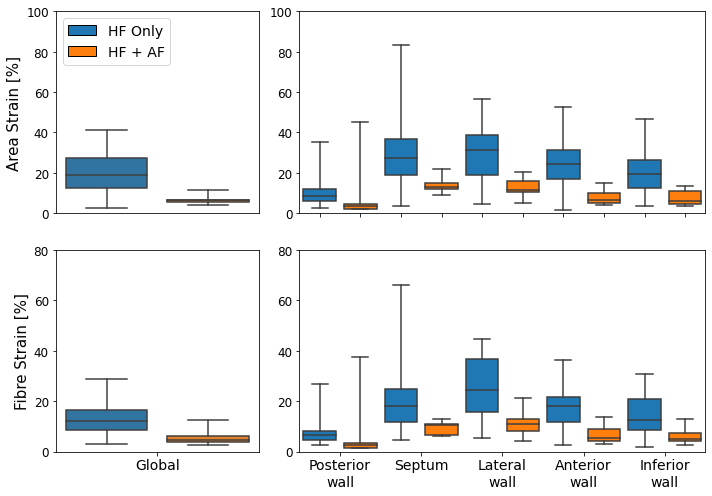

In [13]:
## Combining plots: FIG 2

fig, ((ax1, ax2),
      (ax3, ax4)) = plt.subplots(2,2,figsize=(10,7), facecolor='white', gridspec_kw={'width_ratios': [1, 2]})

ax1_data = [naf_df['area_global_vxm'], af_df['area_global_vxm']]

ax2_data = [naf_df['area_roof_vxm'], af_df['area_roof_vxm'],
               naf_df['area_sept_vxm'], af_df['area_sept_vxm'],
               naf_df['area_lat_vxm'], af_df['area_lat_vxm'],
               naf_df['area_ant_vxm'], af_df['area_ant_vxm'],
               naf_df['area_post_vxm'], af_df['area_post_vxm']]

ax3_data = [naf_df['f1_global_vxm'], af_df['f1_global_vxm']]

ax4_data = [naf_df['f1_roof_vxm'], af_df['f1_roof_vxm'],
               naf_df['f1_sept_vxm'], af_df['f1_sept_vxm'],
               naf_df['f1_lat_vxm'], af_df['f1_lat_vxm'],
               naf_df['f1_ant_vxm'], af_df['f1_ant_vxm'],
               naf_df['f1_post_vxm'], af_df['f1_post_vxm']]

sns.boxplot(data=ax1_data, orient='v', ax=ax1, whis=(0, 100))
sns.boxplot(data=ax2_data, orient='v', ax=ax2, whis=(0, 100))
sns.boxplot(data=ax3_data, orient='v', ax=ax3, whis=(0, 100))
sns.boxplot(data=ax4_data, orient='v', ax=ax4, whis=(0, 100))

regions_axis=['Posterior\nwall', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Inferior\nwall']

ax1.set_ylabel("Area Strain [%]", fontsize=15)
ax3.set_ylabel("Fibre Strain [%]", fontsize=15)

ax3.set_xticks(ticks=np.arange(0.5,1.5,1))
ax3.set_xticklabels(["Global"], fontsize=16)

ax4.set_xticks(ticks=np.arange(0.5,9.5,2))
ax4.set_xticklabels(regions_axis, fontsize=16)

for i in range(0, 10, 2):
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 11, 2):
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:orange')
    
for i in range(0, 10, 2):
    mybox = ax4.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 11, 2):
    mybox = ax4.patches[i]
    mybox.set_facecolor('tab:orange')

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='y', labelsize=12)
    
#     plt.setp(fig.axes[i].get_xticklabels(), rotation=30, horizontalalignment='center')
    fig.axes[i].tick_params(axis='x', labelsize=14)
    
    fig.axes[i].set_yticks(ticks=np.arange(0.0,160,20))

plt.tight_layout()

for i in [0]:
    fig.axes[i].xaxis.set_ticks_position('none') 
    fig.axes[i].set_xticklabels([" ", " "])
    
for i in [1]:
#     fig.axes[i].xaxis.set_ticks_position('none') 
    fig.axes[i].set_xticklabels([" "]*10)

# ax1.set_yticks(ticks=np.arange(0.0,100,20))
# ax2.set_yticks(ticks=np.arange(0.0,100,20))

# ax3.set_yticks(ticks=np.arange(0.0,100,20))

ax1.set_ylim(0.0, 100)
ax2.set_ylim(0.0, 100)

ax3.set_ylim(0.0, 80)
ax4.set_ylim(0.0, 80)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/EHJ_CI/boxplots_vxm", dpi=200, bbox_inches="tight")

In [14]:
for region in regions:
    
    ans_a = stats.ttest_ind(naf_df[f'area_{region}_vxm'], af_df[f'area_{region}_vxm'])
    ans_f1 = stats.ttest_ind(naf_df[f'f1_{region}_vxm'], af_df[f'f1_{region}_vxm'])
    
    print(f"{region}\t area: {ans_a}\n\t f1: {ans_f1}\n")

global	 area: Ttest_indResult(statistic=3.6383703150286335, pvalue=0.0010979788704222476)
	 f1: Ttest_indResult(statistic=3.1236903843988717, pvalue=0.004127232721051733)

roof	 area: Ttest_indResult(statistic=0.7306922341232632, pvalue=0.47103760968796016)
	 f1: Ttest_indResult(statistic=0.5982356519127264, pvalue=0.5544914568162239)

sept	 area: Ttest_indResult(statistic=2.6413057630591856, pvalue=0.013358189651795464)
	 f1: Ttest_indResult(statistic=2.43599667091749, pvalue=0.021468781647742047)

lat	 area: Ttest_indResult(statistic=3.285824939602717, pvalue=0.0027377969281973634)
	 f1: Ttest_indResult(statistic=3.1719230325054073, pvalue=0.0036554818141795974)

ant	 area: Ttest_indResult(statistic=3.877620089362664, pvalue=0.0005828461621188516)
	 f1: Ttest_indResult(statistic=3.63181654755684, pvalue=0.0011170429630058233)

post	 area: Ttest_indResult(statistic=3.121483000578715, pvalue=0.004150159646656817)
	 f1: Ttest_indResult(statistic=2.7063679272788517, pvalue=0.011454009610

## Noramlised Strain Figure

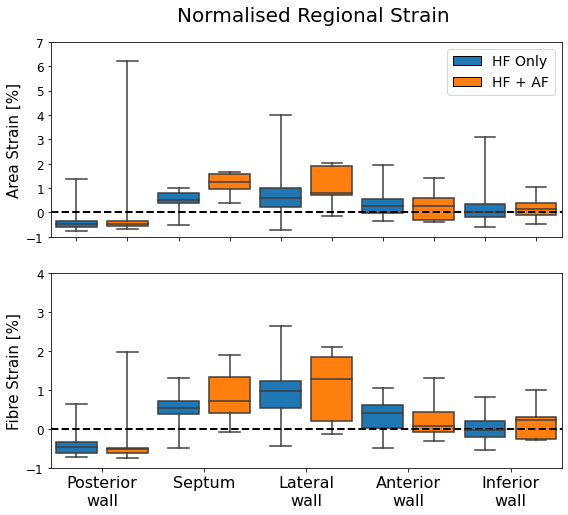

In [36]:
## Combining plots: FIG 2

fig, ((ax1, ax2)) = plt.subplots(2,1,figsize=(8,7), facecolor='white')

ax1_data = [naf_df['area_roof_vxm']/naf_df['area_global_vxm']-1, af_df['area_roof_vxm']/af_df['area_global_vxm']-1,
               naf_df['area_sept_vxm']/naf_df['area_global_vxm']-1, af_df['area_sept_vxm']/af_df['area_global_vxm']-1,
               naf_df['area_lat_vxm']/naf_df['area_global_vxm']-1, af_df['area_lat_vxm']/af_df['area_global_vxm']-1,
               naf_df['area_ant_vxm']/naf_df['area_global_vxm']-1, af_df['area_ant_vxm']/af_df['area_global_vxm']-1,
               naf_df['area_post_vxm']/naf_df['area_global_vxm']-1, af_df['area_post_vxm']/af_df['area_global_vxm']-1]

ax2_data = [naf_df['f1_roof_vxm']/naf_df['f1_global_vxm']-1, af_df['f1_roof_vxm']/af_df['f1_global_vxm']-1,
               naf_df['f1_sept_vxm']/naf_df['f1_global_vxm']-1, af_df['f1_sept_vxm']/af_df['f1_global_vxm']-1,
               naf_df['f1_lat_vxm']/naf_df['f1_global_vxm']-1, af_df['f1_lat_vxm']/af_df['f1_global_vxm']-1,
               naf_df['f1_ant_vxm']/naf_df['f1_global_vxm']-1, af_df['f1_ant_vxm']/af_df['f1_global_vxm']-1,
               naf_df['f1_post_vxm']/naf_df['f1_global_vxm']-1, af_df['f1_post_vxm']/af_df['f1_global_vxm']-1]

sns.boxplot(data=ax1_data, orient='v', ax=ax1, whis=(0, 100))
sns.boxplot(data=ax2_data, orient='v', ax=ax2, whis=(0, 100))

ax1.axhline(y=0.0, linestyle='dashed', lw=2, c='black')
ax2.axhline(y=0.0, linestyle='dashed', lw=2, c='black')

regions_axis=['Posterior\nwall', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Inferior\nwall']

ax1.set_ylabel("Area Strain [%]", fontsize=15)
ax2.set_ylabel("Fibre Strain [%]", fontsize=15)

for i in range(0, 10, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 11, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:orange')
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:orange')

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='HF Only'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='HF + AF')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=14)

for i in range(0, len(fig.axes)):
    fig.axes[i].tick_params(axis='y', labelsize=12)    
#     plt.setp(fig.axes[i].get_xticklabels(), rotation=30, horizontalalignment='center')
    fig.axes[i].tick_params(axis='x', labelsize=14)
    
    fig.axes[i].set_yticks(ticks=np.arange(-1.0,8,1))

plt.suptitle("Normalised Regional Strain", fontsize=20, x=0.55)

plt.tight_layout()

for i in [0]:
#     fig.axes[i].xaxis.set_ticks_position('none') 
    fig.axes[i].set_xticklabels([" "]*10)
    
ax2.set_xticks(ticks=np.arange(0.5,9.5,2))
ax2.set_xticklabels(regions_axis, fontsize=16)

ax1.set_ylim(-1.0, 7)
ax2.set_ylim(-1.0, 4)
# ax3.set_ylim(-1.0, 5)
    
# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/EHJ_CI/normalised_boxplots_vxm", dpi=200, bbox_inches="tight")

In [37]:
for i in range(1, len(regions)):
    region = regions[i]
    
    ans_a = stats.ttest_ind(naf_df[f'area_{region}_vxm']/naf_df[f'area_global_vxm'], af_df[f'area_{region}_vxm']/af_df[f'area_global_vxm'])
    ans_f1 = stats.ttest_ind(naf_df[f'f1_{region}_vxm']/naf_df[f'f1_global_vxm'], af_df[f'f1_{region}_vxm']/af_df[f'f1_global_vxm'])
    
    print(f"{region}\t area: {ans_a}\n\t f1: {ans_f1}\n")

roof	 area: Ttest_indResult(statistic=-1.179837276498627, pvalue=0.24799226373839106)
	 f1: Ttest_indResult(statistic=-0.5266355204174363, pvalue=0.6025941720026753)

sept	 area: Ttest_indResult(statistic=-4.12695766590288, pvalue=0.0002986978933472289)
	 f1: Ttest_indResult(statistic=-1.8286729583448769, pvalue=0.07812002888373326)

lat	 area: Ttest_indResult(statistic=-0.691530957624964, pvalue=0.49492636533706214)
	 f1: Ttest_indResult(statistic=-0.5257581129406262, pvalue=0.6031957594349973)

ant	 area: Ttest_indResult(statistic=0.16379856752705252, pvalue=0.8710663502276103)
	 f1: Ttest_indResult(statistic=0.5275805449017471, pvalue=0.6019465423258252)

post	 area: Ttest_indResult(statistic=-0.1619488824796028, pvalue=0.8725091219557485)
	 f1: Ttest_indResult(statistic=-0.9008676105295085, pvalue=0.3753423949701534)



## AUC Curves

In [38]:
total_cases = cases_df.shape[0]

y_true = np.zeros((total_cases, len(regions)))
y_true[:len(nonaf_cases), :] = 1.0
y_true[len(nonaf_cases):, :] = 0.0

y_fibers = np.zeros((total_cases, len(regions), 2))
y_area = np.zeros((total_cases, len(regions)))
y_lavol = np.zeros((total_cases,))
y_laef = np.zeros((total_cases,))

for i in range(0, len(regions)):
    region = regions[i]
    
    y_fibers[:naf_df.shape[0], i, 0] = naf_df[f'f1_{region}_vxm'].to_numpy()
    y_fibers[naf_df.shape[0]:, i, 0] = af_df[f'f1_{region}_vxm'].to_numpy()
    
    y_fibers[:naf_df.shape[0], i, 1] = naf_df[f'f2_{region}'].to_numpy()
    y_fibers[naf_df.shape[0]:, i, 1] = af_df[f'f2_{region}'].to_numpy()
    
    y_area[:naf_df.shape[0], i] = naf_df[f'area_{region}_vxm'].to_numpy()
    y_area[naf_df.shape[0]:, i] = af_df[f'area_{region}_vxm'].to_numpy()
    
y_lavol[:naf_df.shape[0]] = naf_df['LA_vol_CT'].to_numpy()
y_lavol[naf_df.shape[0]:] = af_df['LA_vol_CT'].to_numpy()

y_laef[:naf_df.shape[0]] = naf_df['LAEF_CT'].to_numpy()
y_laef[naf_df.shape[0]:] = af_df['LAEF_CT'].to_numpy()

In [44]:
len(nonaf_cases)

21

In [45]:
fpr_f1, tpr_f1, thresholds_f1 = metrics.roc_curve(y_true[:, 0], y_fibers[:, 0, 0])
auc_f1 = metrics.roc_auc_score(y_true[:, 0], y_fibers[:, 0, 0])

fpr_f2, tpr_f2, thresholds_f2 = metrics.roc_curve(y_true[:, 0], y_fibers[:, 0, 1])
auc_f2 = metrics.roc_auc_score(y_true[:, 0], y_fibers[:, 0, 1])

fpr_a, tpr_a, thresholds_a = metrics.roc_curve(y_true[:, 0], y_area[:, 0])
auc_a = metrics.roc_auc_score(y_true[:, 0], y_area[:, 0])

fpr_LAEF, tpr_LAEF, thresholds_LAEF = metrics.roc_curve(y_true[:, 0], y_laef[:])
auc_LAEF = metrics.roc_auc_score(y_true[:, 0], y_laef[:])

fpr_LAvol, tpr_LAvol, thresholds_LAvol = metrics.roc_curve(y_true[:, 0], y_lavol[:])
auc_LAvol = metrics.roc_auc_score(y_true[:, 0], y_lavol[:])
auc_LAvol = 1-auc_LAvol

In [46]:
print("AUC fibres f1: ", auc_f1)

print("AUC area: ", auc_a)
print("AUC LAEF: ", auc_LAEF)
print("AUC LAvol: ", auc_LAvol)

AUC fibres f1:  0.8624338624338624
AUC area:  0.8941798941798942
AUC LAEF:  0.8888888888888888
AUC LAvol:  0.8835978835978836


In [47]:
cases_df.columns

Index(['Case', 'Age', 'Sex', 'NYHA class', 'Device present?', 'AF',
       'pre ECG rhythm', 'Pacing changes for CT', 'Pacing',
       'Most recent pacing check prior to CT', 'CT heart rhythm', 'MS QRSd',
       'AL QRSd', 'Comments', 'CT date', 'Heart rate', 'LA strain',
       'LA volume', 'LA size', 'LA emptying fraction', 'LA pressure',
       'LV ES volume', 'LVES diameter (cm)', 'LVEF', 'MR/severity', 'HF meds',
       'Previous ablation', 'Prior mitral procedures', 'af_num', 'area_global',
       'area_roof', 'area_sept', 'area_lat', 'area_ant', 'area_post',
       'area_global_mshqual', 'area_roof_mshqual', 'area_sept_mshqual',
       'area_lat_mshqual', 'area_ant_mshqual', 'area_post_mshqual',
       'f1_global', 'f1_roof', 'f1_sept', 'f1_lat', 'f1_ant', 'f1_post',
       'f2_global', 'f2_roof', 'f2_sept', 'f2_lat', 'f2_ant', 'f2_post',
       'LA_vol_CT', 'LAEF_CT', 'Sex_num', 'LV_vol_CT', 'LVEF_CT',
       'area_global_vxm', 'area_roof_vxm', 'area_sept_vxm', 'area_lat_vxm',


In [48]:
cases_df['af_num']

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    1
15    1
16    1
17    0
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    0
28    0
29    0
Name: af_num, dtype: int64

In [64]:
y_true_veri = cases_df['af_num'].to_numpy()

y_fibres_veri = cases_df['f1_post_vxm'].to_numpy()

1-metrics.roc_auc_score(y_true_veri, y_fibres_veri)

0.7989417989417988

Text(0.5, 1.0, 'LAEF & LA volume')

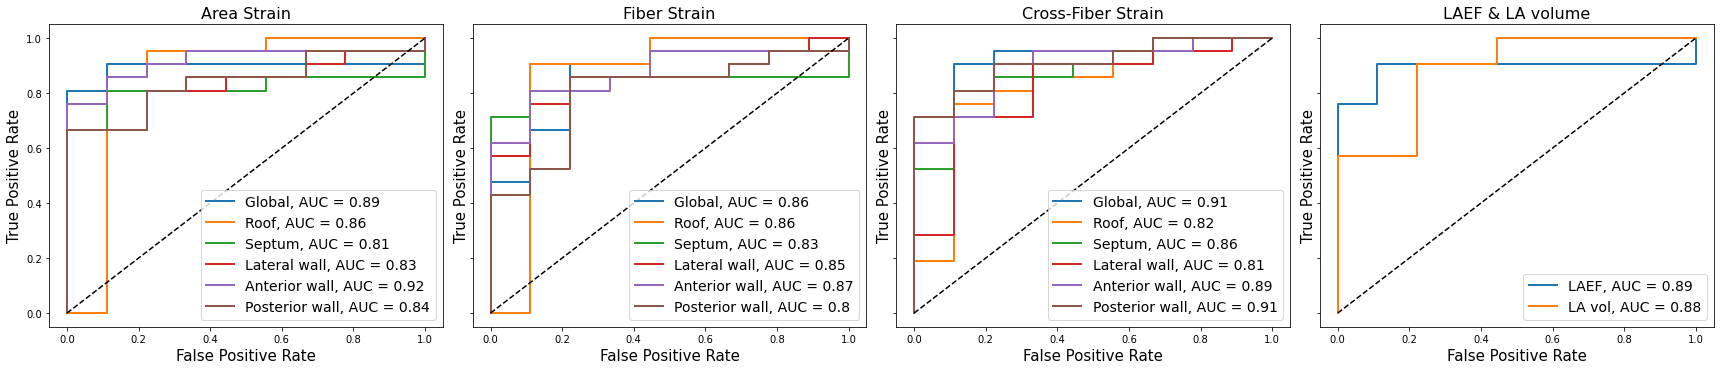

In [65]:
## Plotting all 6 lines on same plot

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4,figsize=(24,5), facecolor='white', sharey=True)

regions_axis=['Global', 'Roof', 'Septum', 'Lateral wall', 'Anterior wall', 'Posterior wall']

for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i], y_area[:, i])
    auc = metrics.roc_auc_score(y_true[:, i], y_area[:, i])
    
    ax1.plot(fpr, tpr, label=f"{regions_axis[i]}, AUC = {str(np.round(auc,2))}", lw='2')

for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i], y_fibers[:, i, 0])
    auc = metrics.roc_auc_score(y_true[:, i], y_fibers[:, i, 0])
    
    ax2.plot(fpr, tpr, label=f"{regions_axis[i]}, AUC = {str(np.round(auc,2))}", lw='2')
    
for i in range(0, len(regions)):
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true[:, i], y_fibers[:, i, 1])
    auc = metrics.roc_auc_score(y_true[:, i], y_fibers[:, i, 1])
    
    ax3.plot(fpr, tpr, label=f"{regions_axis[i]}, AUC = {str(np.round(auc,2))}", lw='2')

fpr_LAEF, tpr_LAEF, thresholds_LAEF = metrics.roc_curve(y_true[:, 0], y_laef[:])
auc_LAEF = metrics.roc_auc_score(y_true[:, 0], y_laef[:])

fpr_LAvol, tpr_LAvol, thresholds_LAvol = metrics.roc_curve(y_true[:, 0], -y_lavol[:])
auc_LAvol = metrics.roc_auc_score(y_true[:, 0], -y_lavol[:])

ax4.plot(fpr_LAEF, tpr_LAEF, label=f"LAEF, AUC = {str(np.round(auc_LAEF,2))}", lw='2')
ax4.plot(fpr_LAvol, tpr_LAvol, label=f"LA vol, AUC = {str(np.round(auc_LAvol,2))}", lw='2')

for i in range(0, len(fig.axes)):
    fig.axes[i].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
    fig.axes[i].set_xlabel("False Positive Rate", fontsize=15)
    fig.axes[i].set_ylabel("True Positive Rate", fontsize=15)
    fig.axes[i].legend(fontsize=14)
    
plt.tight_layout()

ax1.set_title("Area Strain", fontsize=16)
ax2.set_title("Fiber Strain", fontsize=16)
ax3.set_title("Cross-Fiber Strain", fontsize=16)
ax4.set_title("LAEF & LA volume", fontsize=16)

# plt.text(0.6, 0.5, f'AUC = {str(np.round(auc,3))}', size=15)
# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/figures/fig3/fig3_2.png", dpi=200, bbox_inches="tight")

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits=5, shuffle=False)
kf_strat = StratifiedKFold(n_splits=5, shuffle=False)

## Want to use straitifed kfold as want roughly same proportion of AF and nonAF in each fold

## use indices for train and test splits to create pred and true arrays for each fold
## calculate auc for each fold
## calculate roc values for each fold
## use this to calculate mean, std of AUC
## Use this to calculate mean ROC curve coordiantes

In [67]:
nonaf_cases = naf_df['Case']
af_cases = af_df['Case']

In [68]:
all_cases = nonaf_cases + af_cases

In [69]:
af_naf_classes = np.zeros((len(all_cases),))
af_naf_classes[:len(nonaf_cases)] = 0.0
af_naf_classes[len(nonaf_cases):] = 1.0

In [70]:
kf_strat_split = kf_strat.split(all_cases, af_naf_classes)

In [71]:
kf_strat_split_inst = next(kf_strat_split)

training_list = [all_cases[i] for i in kf_strat_split_inst[0]]
val_list = [all_cases[i] for i in kf_strat_split_inst[1]]

In [72]:
total_cases = len(all_cases)

In [73]:
from sklearn.metrics import auc


## Populate y_true and y_pred labels using ALL data
y_true = np.zeros((total_cases, 6))
y_true[:len(nonaf_cases), :] = 1.0
y_true[len(nonaf_cases):, :] = 0.0

# y_probs_fibres = np.zeros((total_cases, 6, 2))
# y_probs_fibres[:len(nonaf_cases), :, 0] = nonAF_fibre_ranges[:, :, 0] 
# y_probs_fibres[len(nonaf_cases):, :, 0] = AF_fibre_ranges[:, :, 0]
# y_probs_fibres[:len(nonaf_cases), :, 1] = nonAF_fibre_ranges[:, :, 1] 
# y_probs_fibres[len(nonaf_cases):, :, 1] = AF_fibre_ranges[:, :, 1]

# y_probs_area = np.zeros((total_cases, 6))
# y_probs_area[:len(nonaf_cases), :] = nonAF_area_ranges[:, :] 
# y_probs_area[len(nonaf_cases):, :] = AF_area_ranges[:, :] 

# y_probs_LAEF = np.zeros((total_cases,))
# y_probs_LAEF[:len(nonaf_cases)] = nonAF_LAEF[:] 
# y_probs_LAEF[len(nonaf_cases):] = AF_LAEF[:] 

# y_probs_LAvol = np.zeros((total_cases,))
# y_probs_LAvol[:len(nonaf_cases)] = nonAF_LAvol[:] 
# y_probs_LAvol[len(nonaf_cases):] = AF_LAvol[:] 

In [74]:
y_lavol

array([123.11901521,  58.76441069,  43.06444671,  64.17869282,
       135.00148667, 129.49272678, 132.01009107, 117.87286138,
       142.9745158 ,  59.74418503,  69.18637305,  79.00631606,
        77.26941488, 127.16264877,  74.21955156,  91.56072922,
        82.73727646, 131.35111729,  50.14238281, 170.50532264,
        57.6703252 , 113.0252409 , 179.53981706, 171.25664156,
       138.66772989,  92.03521881, 139.36320305, 223.17540436,
       202.81816363, 207.93637002])

In [75]:
## Initialise results arrays

## Shape: K_folds X regions
area_auc = np.zeros((5,6))
fibre_f1_auc = np.zeros((5,6))
fibre_f2_auc = np.zeros((5,6))
LAEF_auc = np.zeros((5,))
LAvol_auc = np.zeros((5,))

## Interpolate TPRs 
## Fold X Interpolated size X Region
tprs_f1 = np.zeros((5, 100, 6))
tprs_f2 = np.zeros((5, 100, 6))
tprs_a = np.zeros((5, 100, 6))

## Fold X Interpolated size
tprs_LAEF = np.zeros((5, 100))
tprs_LAvol = np.zeros((5, 100))

mean_fpr = np.linspace(0, 1, 100)

for i, (train_index, test_index) in enumerate(kf_strat.split(all_cases, af_naf_classes)):
    print(f"Fold {i}:")
    
    ## Create pred and true arrays for fold
    y_true_fold = np.take(y_true, train_index, axis=0)
    
    y_probs_fibres_fold = np.take(y_fibers, train_index, axis=0) 
    y_area_fold = np.take(y_area, train_index, axis=0)
    y_probs_LAEF_fold = np.take(y_laef, train_index, axis=0)
    y_probs_LAvol_fold = np.take(y_lavol, train_index, axis=0)
    
    ## Calculate ROC scores
    
    ## iterate over all regions
    for j in range(0, 6):
        
        ## Fiber strains
        fpr_f1, tpr_f1, thresholds_f1 = metrics.roc_curve(y_true_fold[:, j], y_probs_fibres_fold[:, j, 0])
        auc_f1 = metrics.roc_auc_score(y_true_fold[:, j], y_probs_fibres_fold[:, j, 0])
        fibre_f1_auc[i, j] = auc_f1
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_f1, tpr_f1)
        interp_tpr[0] = 0.0
        tprs_f1[i, :, j] = interp_tpr

        ## Cross-fiber strains
        fpr_f2, tpr_f2, thresholds_f2 = metrics.roc_curve(y_true_fold[:, j], y_probs_fibres_fold[:, j, 1])
        auc_f2 = metrics.roc_auc_score(y_true_fold[:, j], y_probs_fibres_fold[:, j, 1])
        fibre_f2_auc[i, j] = auc_f2
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_f2, tpr_f2)
        interp_tpr[0] = 0.0
        tprs_f2[i, :, j] = interp_tpr
        
        ## Area strains
        fpr_a, tpr_a, thresholds_a = metrics.roc_curve(y_true_fold[:, j], y_area_fold[:, j])
        auc_a = metrics.roc_auc_score(y_true_fold[:, j], y_area_fold[:, j])
        area_auc[i, j] = auc_a
        
        ## Interpolate tpr and fpr values
        interp_tpr = np.interp(mean_fpr, fpr_a, tpr_a)
        interp_tpr[0] = 0.0
        tprs_a[i, :, j] = interp_tpr

    ## LAEF
    fpr_LAEF, tpr_LAEF, thresholds_LAEF = metrics.roc_curve(y_true_fold[:, 0], y_probs_LAEF_fold[:])
    auc_LAEF = metrics.roc_auc_score(y_true_fold[:, 0], y_probs_LAEF_fold[:])
    LAEF_auc[i] = auc_LAEF
    
    ## Interpolate tpr and fpr values
    interp_tpr = np.interp(mean_fpr, fpr_LAEF, tpr_LAEF)
    interp_tpr[0] = 0.0
    tprs_LAEF[i, :] = interp_tpr

    ## LA volume
    fpr_LAvol, tpr_LAvol, thresholds_LAvol = metrics.roc_curve(y_true_fold[:, 0], -y_probs_LAvol_fold[:])
    auc_LAvol = metrics.roc_auc_score(y_true_fold[:, 0], -y_probs_LAvol_fold[:])
    LAvol_auc[i] = auc_LAvol
    
    ## Interpolate tpr and fpr values
    interp_tpr = np.interp(mean_fpr, fpr_LAvol, tpr_LAvol)
    interp_tpr[0] = 0.0
    tprs_LAvol[i, :] = interp_tpr

## Calculate mean tpr over folds

mean_tpr_f1 = np.mean(tprs_f1, axis=0)
mean_tpr_f2 = np.mean(tprs_f2, axis=0)
mean_tpr_a = np.mean(tprs_a, axis=0)
mean_tpr_LAEF = np.mean(tprs_LAEF, axis=0)
mean_tpr_LAvol = np.mean(tprs_LAvol, axis=0)

## Set final coordinate as 1

mean_tpr_f1[-1, :] = 1.0
mean_tpr_f2[-1, :] = 1.0
mean_tpr_a[-1, :] = 1.0
mean_tpr_LAEF[-1] = 1.0
mean_tpr_LAvol[-1] = 1.0

mean_auc_f1 = np.mean(fibre_f1_auc, axis=0)
mean_auc_f2 = np.mean(fibre_f2_auc, axis=0)
mean_auc_a = np.mean(area_auc, axis=0)
mean_auc_LAEF = np.mean(LAEF_auc, axis=0)
mean_auc_LAvol = np.mean(LAvol_auc, axis=0)

std_auc_f1 = np.std(fibre_f1_auc, axis=0)
std_auc_f2 = np.std(fibre_f2_auc, axis=0)
std_auc_a = np.std(area_auc, axis=0)
std_auc_LAEF = np.std(LAEF_auc, axis=0)
std_auc_LAvol = np.std(LAvol_auc, axis=0)

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


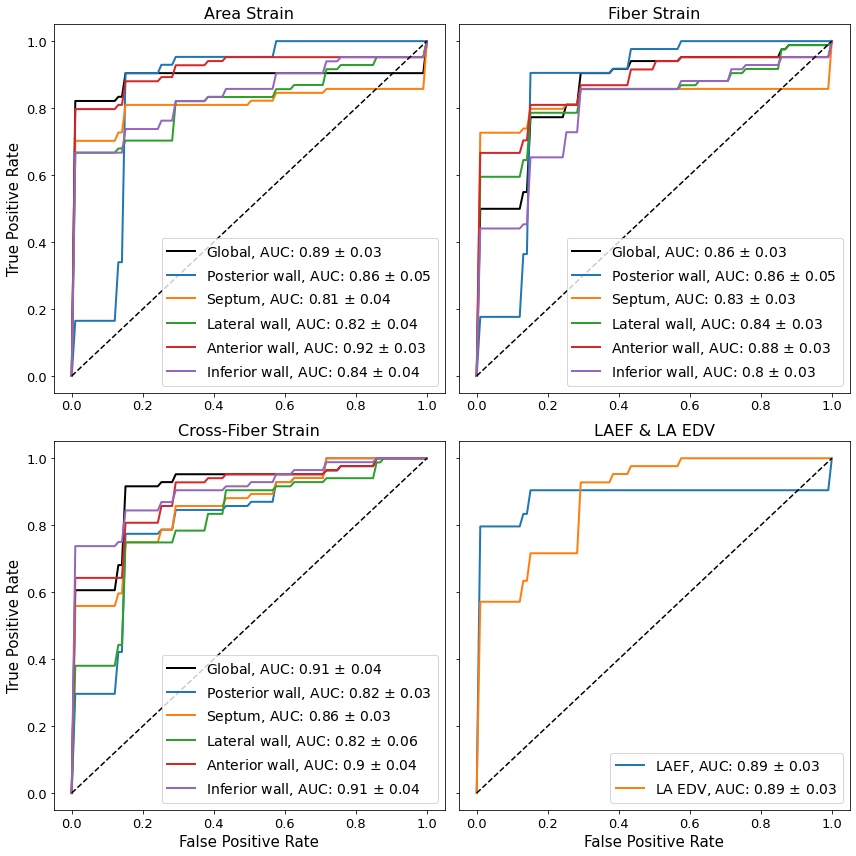

In [78]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,12), facecolor='white', sharey=True)

regions_axis=['Global', 'Posterior wall', 'Septum', 'Lateral wall', 'Anterior wall', 'Inferior wall']

ax1.plot(mean_fpr, mean_tpr_a[:, 0], 
         label=f"{regions_axis[0]}, AUC: {np.round(mean_auc_a[0], 2)} $\pm$ {np.round(std_auc_a[0], 2)}", lw=2, 
         color='black')
ax2.plot(mean_fpr, mean_tpr_f1[:, 0], 
         label=f"{regions_axis[0]}, AUC: {np.round(mean_auc_f1[0], 2)} $\pm$ {np.round(std_auc_f1[0], 2)}", lw=2, 
         color='black')    
ax3.plot(mean_fpr, mean_tpr_f2[:, 0], 
         label=f"{regions_axis[0]}, AUC: {np.round(mean_auc_f2[0], 2)} $\pm$ {np.round(std_auc_f2[0], 2)}", lw=2, 
         color='black')    

for i in range(1, len(regions)):
    ax2.plot(mean_fpr, mean_tpr_f1[:, i], 
             label=f"{regions_axis[i]}, AUC: {np.round(mean_auc_f1[i], 2)} $\pm$ {np.round(std_auc_f1[i], 2)}", lw=2)
    
    ax3.plot(mean_fpr, mean_tpr_f2[:, i], 
             label=f"{regions_axis[i]}, AUC: {np.round(mean_auc_f2[i], 2)} $\pm$ {np.round(std_auc_f2[i], 2)}", lw=2)
    
    ax1.plot(mean_fpr, mean_tpr_a[:, i], 
             label=f"{regions_axis[i]}, AUC: {np.round(mean_auc_a[i], 2)} $\pm$ {np.round(std_auc_a[i], 2)}", lw=2)
    
ax4.plot(mean_fpr, mean_tpr_LAEF, 
             label=f"LAEF, AUC: {np.round(mean_auc_LAEF, 2)} $\pm$ {np.round(std_auc_LAEF, 2)}", lw=2)
    
ax4.plot(mean_fpr, mean_tpr_LAvol, 
             label=f"LA EDV, AUC: {np.round(mean_auc_LAvol, 2)} $\pm$ {np.round(std_auc_LAvol, 2)}", lw=2)

for i in range(0, len(fig.axes[:])):
#     fig.axes[i].legend(fontsize=14, bbox_to_anchor=(0.3, 0.55))
    fig.axes[i].plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), ls='--', c='black')
    fig.axes[i].tick_params(axis='both', labelsize=13)

fig.axes[0].set_ylabel("True Positive Rate", fontsize=15)
fig.axes[2].set_ylabel("True Positive Rate", fontsize=15)
fig.axes[2].set_xlabel("False Positive Rate", fontsize=15)
fig.axes[3].set_xlabel("False Positive Rate", fontsize=15)

for i in range(0, 4, 1):
    fig.axes[i].legend(fontsize=14, loc='lower right')

ax1.set_title("Area Strain", fontsize=16)
ax2.set_title("Fiber Strain", fontsize=16)
ax3.set_title("Cross-Fiber Strain", fontsize=16)
ax4.set_title("LAEF & LA EDV", fontsize=16)
plt.tight_layout()

# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/EHJ_CI/roc_curves_vxm.png", dpi=200, bbox_inches="tight")